In [8]:
import numpy as np
import pandas as pd

In [9]:
from nba_api.stats.static import players
player_dict = players.get_players()

from nba_api.stats.static import teams
teams = teams.get_teams()

In [10]:
selected_player = [player for player in player_dict
                  if player['full_name'] == 'RJ Barrett'][0]
selected_player

{'id': 1629628,
 'full_name': 'RJ Barrett',
 'first_name': 'RJ',
 'last_name': 'Barrett',
 'is_active': True}

In [19]:
selected_team = [team for team in teams
                if team['full_name'] == 'New York Knicks'][0]
selected_team

{'id': 1610612752,
 'full_name': 'New York Knicks',
 'abbreviation': 'NYK',
 'nickname': 'Knicks',
 'city': 'New York',
 'state': 'New York',
 'year_founded': 1946}

In [20]:
p_id = selected_player['id']
t_id = selected_team['id']

In [12]:
from nba_api.stats.endpoints import commonplayerinfo

player_info = commonplayerinfo.CommonPlayerInfo(player_id=p_id)
player_info_dict = player_info.get_dict()
keys = player_info_dict['resultSets'][0]['headers']
values = player_info_dict['resultSets'][0]['rowSet']

df_player_info = pd.DataFrame(list(values),columns = list(keys)) 
df_player_info

,PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,...,PLAYERCODE,FROM_YEAR,TO_YEAR,DLEAGUE_FLAG,NBA_FLAG,GAMES_PLAYED_FLAG,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER,GREATEST_75_FLAG
0,1629628,RJ,Barrett,RJ Barrett,"Barrett, RJ",R. Barrett,rj-barrett,2000-06-14T00:00:00,Duke,Canada,...,rj_barrett,2019,2021,N,Y,Y,2019,1,3,N


In [13]:
from nba_api.stats.endpoints import playergamelog, shotchartdetail

In [15]:
game_log = playergamelog.PlayerGameLog(player_id=p_id, season_type_all_star='Regular Season', season='2021-22')
game_log = game_log.get_data_frames()[0]
game_log.sort_values(by='GAME_DATE', ascending=False)
game_log.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22021,1629628,0022100974,"MAR 07, 2022",NYK @ SAC,W,37,11,21,0.524,...,8,8,6,0,0,3,5,29,23,1
1,22021,1629628,0022100966,"MAR 06, 2022",NYK @ LAC,W,33,8,18,0.444,...,9,9,4,0,0,2,3,24,36,1
2,22021,1629628,0022100953,"MAR 04, 2022",NYK @ PHX,L,44,6,26,0.231,...,3,5,5,0,0,3,2,20,-12,1
3,22021,1629628,0022100934,"MAR 02, 2022",NYK @ PHI,L,40,10,23,0.435,...,5,6,7,0,0,3,3,30,-11,1
4,22021,1629628,0022100912,"FEB 27, 2022",NYK vs. PHI,L,38,9,22,0.409,...,4,5,6,2,0,4,1,24,-20,1


In [21]:
# get most recent game_ID
g_id = game_log['Game_ID'][0]
shot_detail = shotchartdetail.ShotChartDetail(player_id=p_id, team_id=t_id, context_measure_simple='FGA',
                                             season_type_all_star='Regular Season', season_nullable='2021-22', game_id_nullable=g_id)
shot_df = shot_detail.get_data_frames()[0]
shot_df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022100974,11,1629628,RJ Barrett,1610612752,New York Knicks,1,11,27,...,Center(C),24+ ft.,25,12,258,1,0,20220307,SAC,NYK
1,Shot Chart Detail,0022100974,26,1629628,RJ Barrett,1610612752,New York Knicks,1,10,7,...,Center(C),Less Than 8 ft.,3,34,13,1,0,20220307,SAC,NYK
2,Shot Chart Detail,0022100974,55,1629628,RJ Barrett,1610612752,New York Knicks,1,7,38,...,Right Side(R),8-16 ft.,13,134,10,1,0,20220307,SAC,NYK
3,Shot Chart Detail,0022100974,59,1629628,RJ Barrett,1610612752,New York Knicks,1,7,12,...,Center(C),Less Than 8 ft.,5,-33,49,1,0,20220307,SAC,NYK
4,Shot Chart Detail,0022100974,81,1629628,RJ Barrett,1610612752,New York Knicks,1,6,7,...,Center(C),Less Than 8 ft.,1,-1,10,1,1,20220307,SAC,NYK


In [22]:
labels = ["Missed", "Made"]
shot_df["SHOT_RESULT"] = shot_df["SHOT_MADE_FLAG"].map(dict(zip(range(0,2), labels)))
shot_df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,SHOT_RESULT
0,Shot Chart Detail,0022100974,11,1629628,RJ Barrett,1610612752,New York Knicks,1,11,27,...,24+ ft.,25,12,258,1,0,20220307,SAC,NYK,Missed
1,Shot Chart Detail,0022100974,26,1629628,RJ Barrett,1610612752,New York Knicks,1,10,7,...,Less Than 8 ft.,3,34,13,1,0,20220307,SAC,NYK,Missed
2,Shot Chart Detail,0022100974,55,1629628,RJ Barrett,1610612752,New York Knicks,1,7,38,...,8-16 ft.,13,134,10,1,0,20220307,SAC,NYK,Missed
3,Shot Chart Detail,0022100974,59,1629628,RJ Barrett,1610612752,New York Knicks,1,7,12,...,Less Than 8 ft.,5,-33,49,1,0,20220307,SAC,NYK,Missed
4,Shot Chart Detail,0022100974,81,1629628,RJ Barrett,1610612752,New York Knicks,1,6,7,...,Less Than 8 ft.,1,-1,10,1,1,20220307,SAC,NYK,Made


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

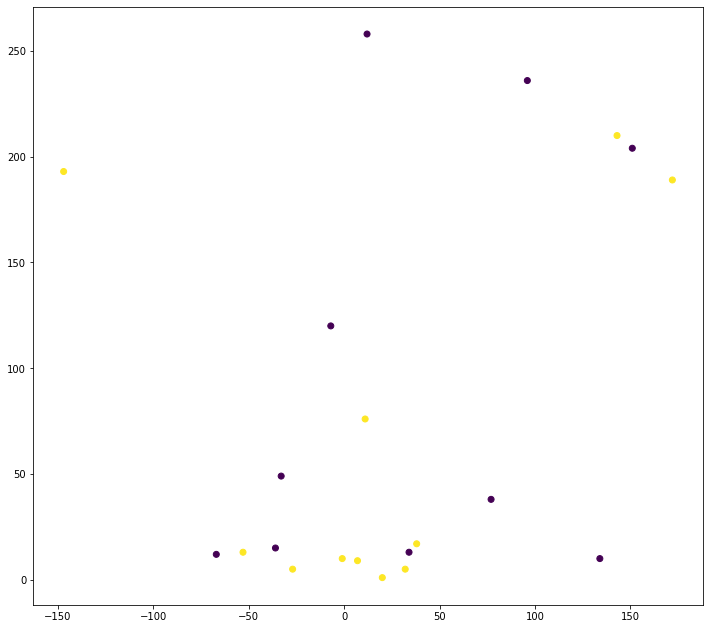

In [28]:
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X, shot_df.LOC_Y, c=shot_df.SHOT_MADE_FLAG)
plt.show()

The source for the following cell is http://savvastjortjoglou.com/nba-shot-sharts.html

In [32]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [33]:
def drawchart(df, dotcolor, color='white', lw=4, axes_color='black', face_color='white'):
    plt.figure()
    sns.set(rc={'figure.figsize': (5*2, 4.7*2),
               'axes.facecolor':axes_color, 'figure.facecolor':face_color, 'lines.markersize':10})
    sns.set_style({'axes.grid': False})
    sc = sns.scatterplot(x='LOC_X', y='LOC_Y', data=df, color=color, hue='SHOT_RESULT', s=200)
    draw_court(outer_lines=True, color=color, lw=lw)

In [34]:
sns.set_style('dark')
shot_chart = draw_chart(shot_df, 'red', color='white')

NameError: name 'draw_chart' is not defined